<a href="https://colab.research.google.com/github/jeetshah0303/Artificialintelligence/blob/main/PADLab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#outlier detection using isolation forest

In [2]:
#part a : implementing isolation forest on a randomly generated dataset 


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [4]:
#generating the dataset 
X=0.3*np.random.randn(100,2)
X.shape

(100, 2)

In [5]:
X_train_normal=np.r_[X+2,X-2]#Concanted the first axis ie row 


In [6]:
print(X.shape,X_train_normal.shape)

(100, 2) (200, 2)


In [7]:
#generate a dataset for testing
X=0.3*np.random.randn(50,2)
X_test_normal=np.r_[X+2,X-2]

In [8]:
print(X.shape,X_test_normal.shape)



(50, 2) (100, 2)


In [9]:
#generate outliers for training 
X_train_outliers=np.random.uniform(low=-4,high=4,size=(20,2))


In [10]:
X_train_outliers.shape

(20, 2)

In [11]:
#generate outlier for testing 
X_test_outliers=np.random.uniform(low=-4,high=4,size=(10,2))

In [12]:
X_test_outliers.shape

(10, 2)

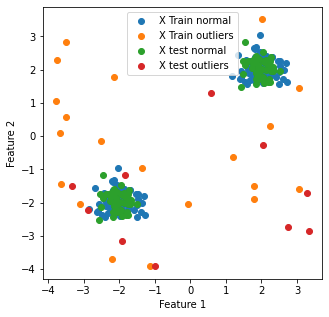

In [13]:
#visualising the data 
plt.figure(figsize=(5,5))
plt.scatter(X_train_normal[:,0],X_train_normal[:,1],label="X Train normal")
plt.scatter(X_train_outliers[:,0],X_train_outliers[:,1],label="X Train outliers")
plt.scatter(X_test_normal[:,0],X_test_normal[:,1],label="X test normal")
plt.scatter(X_test_outliers[:,0],X_test_outliers[:,1],label="X test outliers")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

In [14]:

X_train=np.append(X_train_normal,X_train_outliers,axis=0)

X_test=np.append(X_test_normal,X_test_outliers,axis=0)

In [15]:
#training with isolation forest 
from sklearn.ensemble import IsolationForest
model=IsolationForest(random_state=1,contamination =0.1)


In [16]:
model.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=1, verbose=0, warm_start=False)

In [17]:
#prediction 
#since the model is unsupervised well test on train as well as test data
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)

Text(0, 0.5, 'feature 2')

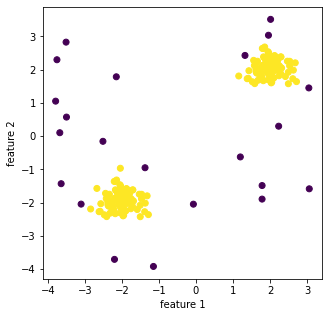

In [18]:
#visualise the predictions 
plt.figure(figsize=(5,5))
plt.scatter(X_train[:,0],X_train[:,1],c=pred_train)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

Text(0, 0.5, 'feature 2')

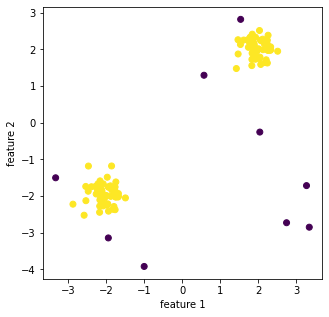

In [19]:
#visualise the predictions 
plt.figure(figsize=(5,5))
plt.scatter(X_test[:,0],X_test[:,1],c=pred_test)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [20]:
#Part B : Isolation forest on the creditcard dataset 

In [21]:
#df=pd.read_csv('/drive/MyDrive/Colab Notebooks/creditcard.csv')
df=pd.read_csv('creditcard.csv')

In [22]:
df.shape

(5974, 31)

In [23]:
normal=df[df['Class']==0]
fraud=df[df['Class']==1]

In [24]:
print(normal.shape,fraud.shape)

(5970, 31) (3, 31)


In [25]:
data=df.sample(frac=0.2,random_state=1)

In [26]:
data.shape

(1195, 31)

In [27]:
normal_frac=data[data['Class']==0]
fraud_frac=data[data['Class']==1]

In [28]:
normal_frac.shape

(1193, 31)

In [29]:
fraud_frac.shape

(2, 31)

In [30]:
anomaly_fraction=len(fraud_frac)/float(len(data)) #going to be used for contamination 

In [31]:
#train the model
model=IsolationForest(n_estimators=100,contamination=anomaly_fraction,random_state=1)


In [32]:
model.fit(data[['Class']])

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.0016736401673640166, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=1, verbose=0, warm_start=False)

In [33]:
#decision boundary for class 0 or 1
data['scores']=model.decision_function(data[['Class']])

In [34]:
data['anomaly_score']=model.predict(data[['Class']])

In [35]:
data.shape

(1195, 33)

In [36]:
data[data['anomaly_score']==-1].head() #is in fradulent class

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scores,anomaly_score
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0,-0.144781,-1
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0,-0.144781,-1


In [37]:
#checking the accuracy of the model
anomaly_count=data[data['Class']==1]
anomaly_count=anomaly_count.shape[0]

In [38]:
accuracy = 100*list(data['anomaly_score']).count(-1)/(anomaly_count)

In [39]:
anomaly_count

2

In [40]:
accuracy

100.0